In [1]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
train_path_1 = '../data/esnli_train_1.csv'
train_path_2 = '../data/esnli_train_2.csv'
dev_path = '../data/esnli_dev.csv'
test_path = '../data/esnli_test.csv'

In [3]:
# read in the data
train_1 = pd.read_csv(train_path_1)
train_2 = pd.read_csv(train_path_2)
dev = pd.read_csv(dev_path)
test = pd.read_csv(test_path)

In [4]:
# combine the train data
train = pd.concat([train_1, train_2])

In [5]:
# Visualize the training data
train.head()

,pairID,gold_label,Sentence1,Sentence2,Explanation_1,WorkerId,Sentence1_marked_1,Sentence2_marked_1,Sentence1_Highlighted_1,Sentence2_Highlighted_1
0,3416050480.jpg#4r1n,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,the person is not necessarily training his horse,AF0PI3RISB5Q7,A person on a horse jumps over a broken down a...,A person is *training* *his* *horse* for a co...,{},"3,4,5"
1,3416050480.jpg#4r1c,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",One cannot be on a jumping horse cannot be a d...,A36ZT2WFIA2HMF,A person *on* *a* *horse* *jumps* over a brok...,"A person *is* *at* *a* *diner,* *ordering* an...","4,2,3,5","2,5,4,3,6"
2,3416050480.jpg#4r1e,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",a broken down airplane is outdoors,A2GK75ZQTX2RDZ,A person on a horse jumps over *a* *broken* *...,"A person is *outdoors,* on a horse.","8,9,10,7",3
3,2267923837.jpg#2r1n,neutral,Children smiling and waving at camera,They are smiling at their parents,Just because they are smiling and waving at a ...,A18TOIDG32QICP,Children smiling and waving at camera,They are smiling *at* *their* *parents*,{},"5,3,4"
4,2267923837.jpg#2r1e,entailment,Children smiling and waving at camera,There are children present,The children must be present to see them smili...,AEX0YE6TUZRHT,*Children* *smiling* *and* *waving* at camera,There are children *present*,"0,1,3,2",3


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549367 entries, 0 to 289367
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   pairID                   549367 non-null  object
 1   gold_label               549367 non-null  object
 2   Sentence1                549367 non-null  object
 3   Sentence2                549361 non-null  object
 4   Explanation_1            549342 non-null  object
 5   WorkerId                 549342 non-null  object
 6   Sentence1_marked_1       549342 non-null  object
 7   Sentence2_marked_1       549342 non-null  object
 8   Sentence1_Highlighted_1  549342 non-null  object
 9   Sentence2_Highlighted_1  549342 non-null  object
dtypes: object(10)
memory usage: 46.1+ MB


In [7]:
# count the number of examples in each class
train['gold_label'].value_counts()

entailment       183416
contradiction    183187
neutral          182764
Name: gold_label, dtype: int64

In [8]:
def plot_class_distribution(df, title, file_name, center):
    sns.countplot(x='gold_label', data=df)
    plt.title(title)
    ax = plt.gca()
    for p in ax.patches:
        # put the count of each class on top of the bar and in the middle
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / center, p.get_height() / 2))
    plt.savefig(file_name, bbox_inches='tight', pad_inches=0.5, dpi=300)

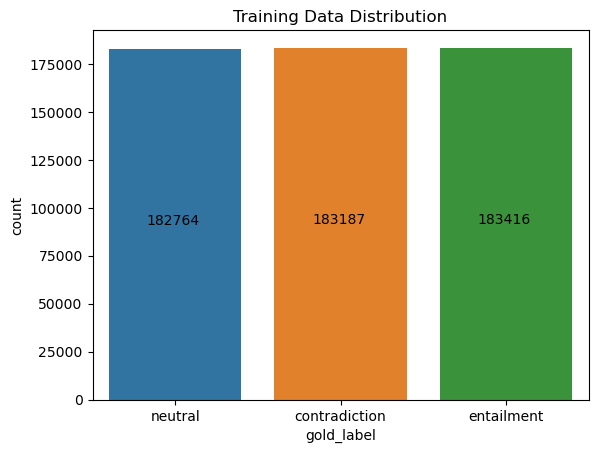

In [9]:
plot_class_distribution(train, 'Training Data Distribution', '../plots/train_class_distribution.png', 3.5)

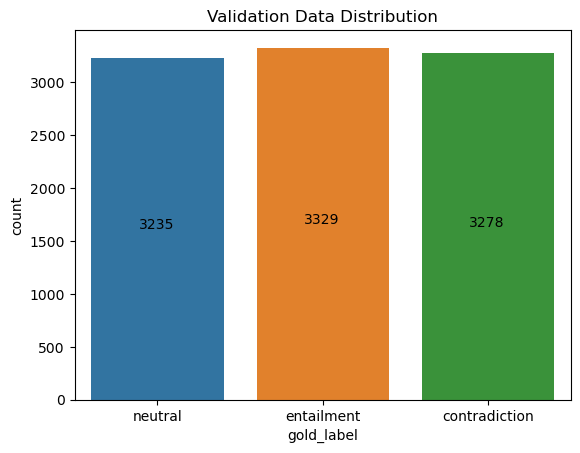

In [10]:
plot_class_distribution(dev, 'Validation Data Distribution', '../plots/dev_class_distribution.png', 2.8)

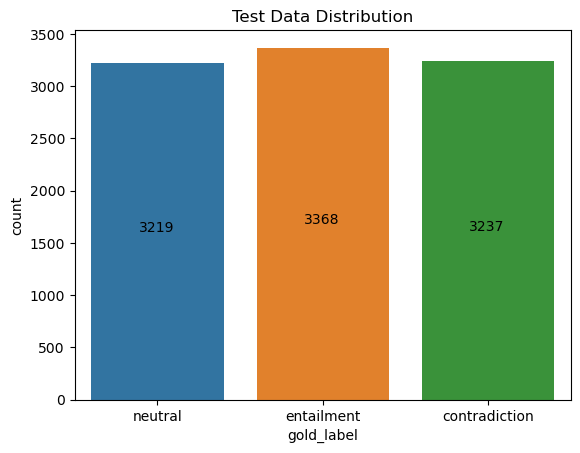

In [11]:
plot_class_distribution(test, 'Test Data Distribution', '../plots/test_class_distribution.png', 2.8)

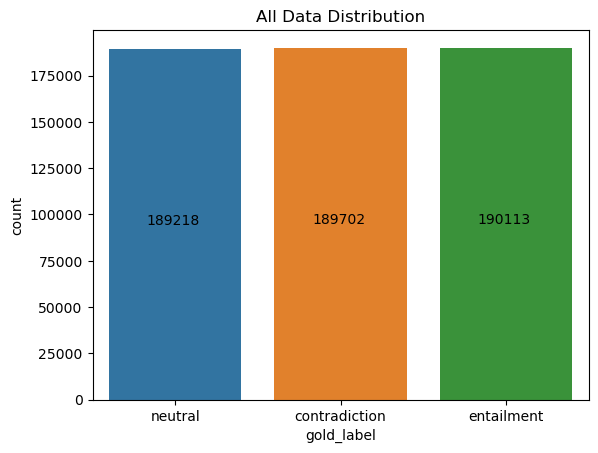

In [12]:
# combine all the data
all_data = pd.concat([train, dev, test])
plot_class_distribution(all_data, 'All Data Distribution', '../plots/all_data_class_distribution.png', 3.5)

In [13]:
def plot_sentence_length_distribution(df, title, file_name):
    df = df.copy()
    df['Premise'] = df['Sentence1'].apply(lambda x: len(x.split()))
    df['Hypothesis'] = df['Sentence2'].apply(lambda x: len(str(x).split()))
    # plot the distribution of the premise and hypothesis lengths in the same plot
    plt.figure(figsize=(10, 5))
    plt.hist([df['Premise'], df['Hypothesis']], bins=50, label=['Premise', 'Hypothesis'])
    plt.legend(loc='upper right')
    plt.title(title)
    plt.xlabel('Sentence Length')
    plt.ylabel('Count')
    plt.savefig(file_name, bbox_inches='tight', pad_inches=0.5, dpi=300)

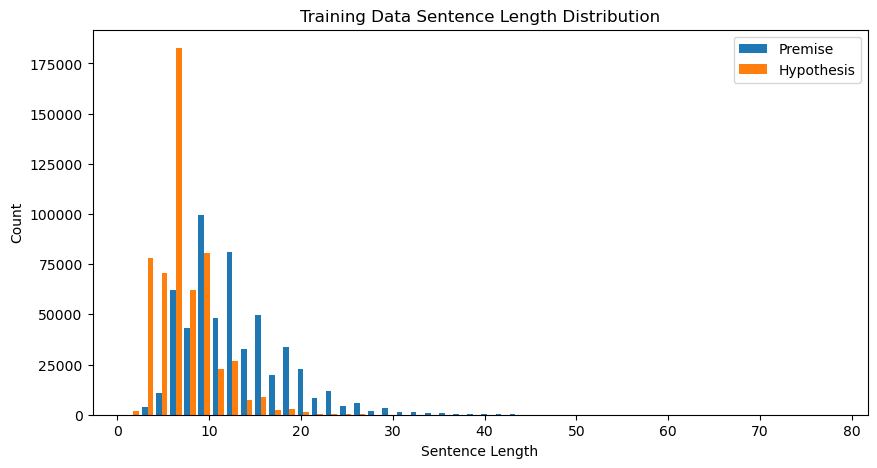

In [14]:
plot_sentence_length_distribution(train, 'Training Data Sentence Length Distribution', '../plots/train_sentence_length_distribution.png')

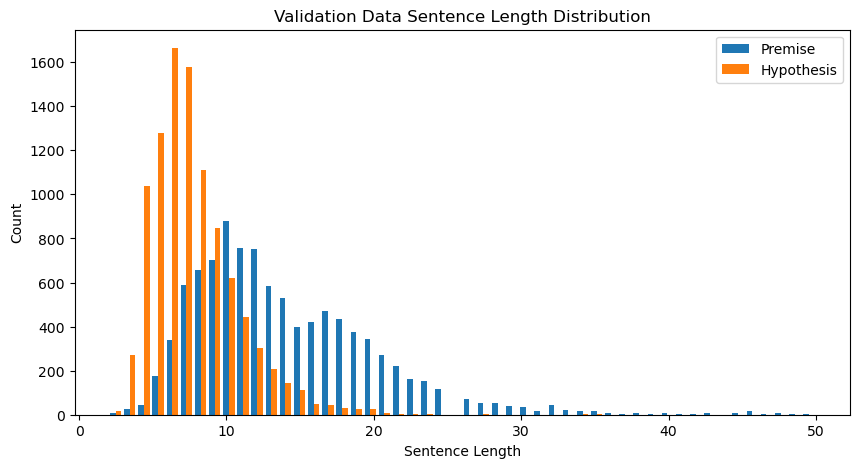

In [15]:
plot_sentence_length_distribution(dev, 'Validation Data Sentence Length Distribution', '../plots/dev_sentence_length_distribution.png')

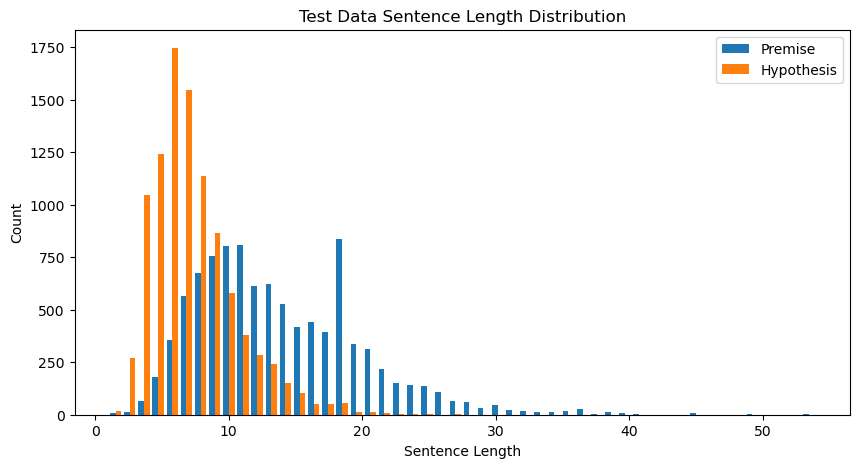

In [16]:
plot_sentence_length_distribution(test, 'Test Data Sentence Length Distribution', '../plots/test_sentence_length_distribution.png')

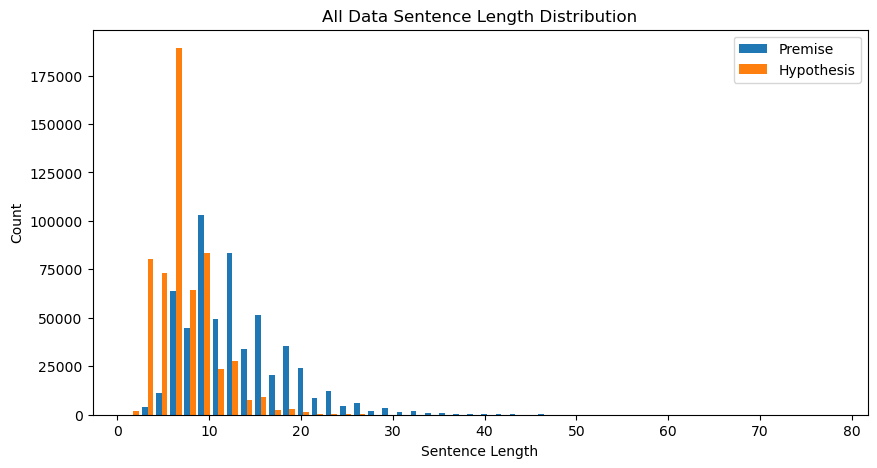

In [17]:
plot_sentence_length_distribution(all_data, 'All Data Sentence Length Distribution', '../plots/all_data_sentence_length_distribution.png')

In [18]:
# analyze the statistics of the premise and hypothesis lengths
def analyze_sentence_length(df):
    df = df.copy()
    df['Premise'] = df['Sentence1'].apply(lambda x: len(x.split()))
    df['Hypothesis'] = df['Sentence2'].apply(lambda x: len(str(x).split()))
    print(df.describe())

In [19]:
analyze_sentence_length(train)

             Premise     Hypothesis
count  549367.000000  549367.000000
mean       12.849376       7.415748
std         5.656857       3.067807
min         2.000000       1.000000
25%         9.000000       5.000000
50%        12.000000       7.000000
75%        16.000000       9.000000
max        78.000000      56.000000


In [20]:
analyze_sentence_length(dev)

           Premise   Hypothesis
count  9842.000000  9842.000000
mean     13.938326     7.510669
std       6.316240     3.134414
min       2.000000     2.000000
25%       9.000000     5.000000
50%      12.000000     7.000000
75%      18.000000     9.000000
max      50.000000    48.000000


In [21]:
analyze_sentence_length(test)

           Premise   Hypothesis
count  9824.000000  9824.000000
mean     13.909507     7.482288
std       6.177781     3.080232
min       2.000000     1.000000
25%       9.000000     5.000000
50%      13.000000     7.000000
75%      18.000000     9.000000
max      54.000000    29.000000
